In [1]:
#Import packages
import rasterio as rio
from rasterio.plot import show
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
import numpy as np
from rasterio.mask import mask
import os

#Import Earth Lab packages now
import earthpy as et 
import earthpy.spatial as es

#
plt.ion()
os.getcwd()
os.chdir(os.path.join(et.io.HOME, 'earth-analytics/'))
os.getcwd()

'/home/jovyan/earth-analytics'

* import a DTM
* import a DSM
* create a CHM
* take a look at the histogram of the CHM
* binning the CHM 
* output the CHM


In [3]:
sjer_dtm_path = '/data/spatial-vector-lidar/california/neon-sjer-site/2013/lidar/SJER_lidarDTM.tif'
with rio.open(sjer_dtm_path, 'r') as src:
    sjer_dtm = src.read(1, masked=True)

In [4]:
sjer_dtm.shape

(5059, 4296)

In [5]:
sjer_dsm_path = '/data/spatial-vector-lidar/california/neon-sjer-site/2013/lidar/SJER_lidarDSM.tif'
with rio.open(sjer_dsm_path, 'r') as src:
    sjer_dsm = src.read(1, masked=True)

In [6]:
sjer_dsm.shape, sjer_dtm.shape # good, they have the same shape

((5059, 4296), (5059, 4296))

In [7]:
# subtract digital terrain model from digital surface model to get canopy height model.
chm = sjer_dsm - sjer_dtm 

In [8]:
chm

masked_array(
  data=[[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        ...,
        [7.7700042724609375, 9.020004272460938, 9.620010375976562, ...,
         0.3699951171875, 0.3800048828125, 0.079986572265625],
        [7.779998779296875, 7.82000732421875, 9.399993896484375, ...,
         0.240020751953125, 0.329986572265625, 0.1400146484375],
        [7.459991455078125, 7.42999267578125, 7.649993896484375, ...,
         0.329986572265625, 0.0, 0.739990234375]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=-9999.0,
  dtype=float32)

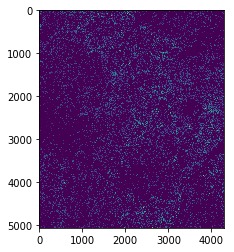

In [12]:
plt.imshow(chm)
plt.show()
lidar_chm = chm

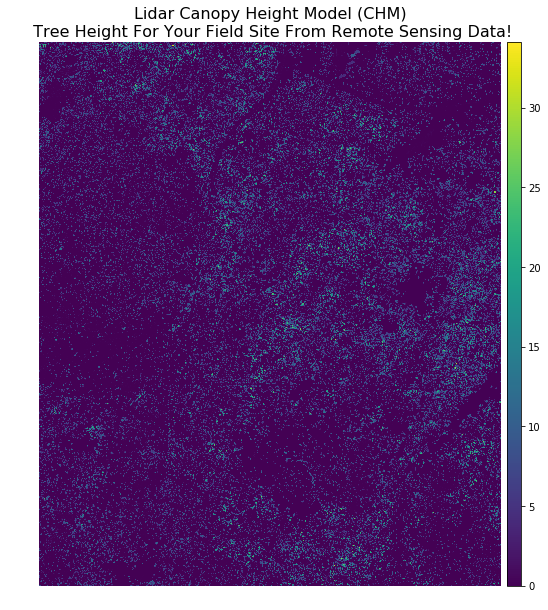

In [13]:
# plotting commands from the lesson notebook

fig, ax = plt.subplots(figsize = (10,10))
chm_plot = ax.imshow(lidar_chm, 
                     cmap='viridis')
ax.set_axis_off()

es.colorbar(chm_plot)
ax.set_title("Lidar Canopy Height Model (CHM)\n Tree Height For Your Field Site From Remote Sensing Data!", 
             fontsize = 16);

In [14]:
print('CHM minimum value: ', lidar_chm.min())
print('CHM max value: ', lidar_chm.max())

CHM minimum value:  0.0
CHM max value:  34.119995


(array([1.7680455e+07, 1.9225370e+06, 1.4331610e+06, 3.9054700e+05,
        1.5471300e+05, 9.7848000e+04, 4.3019000e+04, 1.0137000e+04,
        9.5700000e+02, 8.9000000e+01]),
 array([ 0.        ,  3.41199951,  6.82399902, 10.23599854, 13.64799805,
        17.05999756, 20.47199707, 23.88399658, 27.29599609, 30.70799561,
        34.11999512]),
 <a list of 10 Patch objects>)

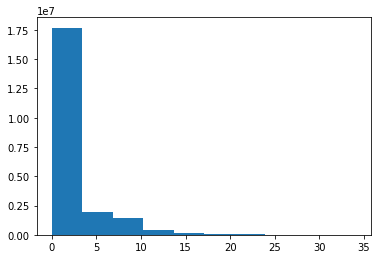

In [15]:
# If you don't .ravel(), then pyplot will try to make a separate histogram for each column of the array. 
# i.e. ~4000 histograms. Takes forever.
plt.hist(chm.ravel())

(array([2.14947e+05, 1.69181e+05, 1.46473e+05, 1.40939e+05, 1.35863e+05,
        1.30579e+05, 1.36545e+05, 1.37021e+05, 1.49051e+05, 1.58722e+05,
        1.65609e+05, 1.81917e+05, 1.90586e+05, 1.92505e+05, 2.03703e+05,
        2.01089e+05, 2.09612e+05, 2.07874e+05, 1.97272e+05, 1.95998e+05,
        1.88649e+05, 1.72579e+05, 1.64603e+05, 1.46056e+05, 1.36036e+05,
        1.21329e+05, 1.02890e+05, 9.29400e+04, 7.87860e+04, 6.94470e+04,
        5.94790e+04, 4.92900e+04, 4.36460e+04, 3.73360e+04, 3.11330e+04,
        2.83710e+04, 2.43310e+04, 2.26600e+04, 2.09700e+04, 1.86840e+04,
        1.81450e+04, 1.69910e+04, 1.58450e+04, 1.55240e+04, 1.45000e+04,
        1.43590e+04, 1.38730e+04, 1.29320e+04, 1.26900e+04, 1.23610e+04,
        1.15170e+04, 1.12180e+04, 1.05710e+04, 1.03340e+04, 9.68700e+03,
        8.74000e+03, 8.40000e+03, 7.69200e+03, 7.30100e+03, 6.89500e+03,
        6.07500e+03, 5.67400e+03, 5.20700e+03, 4.60100e+03, 4.17100e+03,
        3.59500e+03, 3.19500e+03, 2.86400e+03, 2.44

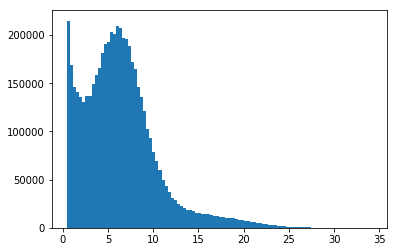

In [22]:
chm_temp = chm[chm > 0.5]
plt.hist(chm_temp.ravel(), bins=100)

In [23]:
with rio.open(sjer_dsm_path, 'r') as src:
    dsm_meta = src.profile
    
dsm_meta

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4296, 'height': 5059, 'count': 1, 'crs': CRS({'init': 'epsg:32611'}), 'transform': Affine(1.0, 0.0, 254571.0,
       0.0, -1.0, 4112362.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}

In [25]:
chm_path = '/data/spatial-vector-lidar/outputs/chm_sjer.tif'

# this code writes the file todisk
with rio.open(chm_path, 'w', **dsm_meta) as dst:
    dst.write(chm, 1)

CPLE_OpenFailedError: Attempt to create new tiff file '/data/spatial-vector-lidar/outputs/chm_sjer.tif' failed: Permission denied

In [27]:
# reopen the file just written 
with rio.open(chm_path, 'r') as src:
    print(src.profile)
    print(src.read().shape)

RasterioIOError: /data/spatial-vector-lidar/outputs/chm_sjer.tif: No such file or directory